# Jupyter notebook sample

# Resizing pictures(.ppm files) to 32 x 32


In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers


dataset_path = "C:/Users/WWC/DataspellProjects/TrafficSignalRecognition/gtsrb"


def load_dataset(dataset_path):
    images = []
    labels = []

    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)

     
        if os.path.isdir(folder_path):
            try:
                label = int(folder)  

               
                for filename in os.listdir(folder_path):
                    if filename.endswith(".ppm"):
                        image_path = os.path.join(folder_path, filename)
                        image = cv2.imread(image_path)
                        image = cv2.resize(image, (32, 32))  

                        images.append(image)
                        labels.append(label)
            except ValueError:
                print(f"Ignoring folder '{folder}' as it is not a valid integer label.")

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    return images, labels


# LOAD DATASET

In [2]:

images, labels = load_dataset(dataset_path)

images /= 255.0 

Ignoring folder '.idea' as it is not a valid integer label.


In [3]:

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [4]:
        
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(43, activation='softmax') 
])

In [5]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
600/600 [==============================] - 34s 54ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.0738 - val_accuracy: 0.9912
Epoch 2/100
600/600 [==============================] - 32s 53ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0616 - val_accuracy: 0.9934
Epoch 3/100
600/600 [==============================] - 30s 51ms/step - loss: 8.3255e-05 - accuracy: 0.9999 - val_loss: 0.0822 - val_accuracy: 0.9919
Epoch 4/100
600/600 [==============================] - 30s 51ms/step - loss: 0.0098 - accuracy: 0.9983 - val_loss: 0.1887 - val_accuracy: 0.9805
Epoch 5/100
600/600 [==============================] - 30s 51ms/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 0.0725 - val_accuracy: 0.9919
Epoch 6/100
600/600 [==============================] - 30s 50ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0675 - val_accuracy: 0.9932
Epoch 7/100
600/600 [==============================] - 31s 51ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0689 - va

In [9]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

167/167 [==============================] - 3s 17ms/step - loss: 0.0439 - accuracy: 0.9940
Test Accuracy: 0.9939939975738525


In [10]:
model.save("traffic_sign_classifier.keras")


In [11]:
import cv2
import numpy as np
image_path="C:/Users/WWC/DataspellProjects/TrafficSignalRecognition/stop.jpeg"
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [12]:

input_image = preprocess_image(image_path)
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
print("Predicted Class Index:", predicted_class_index)


1/1 [==============================] - 1s 1s/step
Predicted Class Index: 14


In [13]:
from tensorflow.keras.models import load_model
model = load_model("traffic_sign_classifier.keras")  

In [14]:
class_names = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (40km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Priority",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "Road closed ",
    16: "Vehicles over 3.5 tons prohibited",
    17: "Do not Enter",
    18: "General Danger",
    19: "Left curve",
    20: "Right curve",
    21: "Double curve",
    22: "",  
    23: "Slippery when wet or dry",
    24: "Road narrows",
    25: "Men at work",
    26: "Traffic signal ahead",
    27: "Pedestrians Prohibited",
    28: "",  
    29: "Bicycle crossing",
    30: "Ice/snow ahead",
    31: "Wild Animal crossing",
    32: "",  
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Ahead or right turn only",
    37: "Ahead or left turn only",
    38: "Pass by on right",
    39: "Pass by on left",
    40: "Roundabout",
    41: "End of no passing zone",
    42: "End of no passing zone for trucks"
}

In [15]:
predicted_traffic_sign = class_names.get(predicted_class_index, "Unknown")
print("Predicted Traffic Sign:", predicted_traffic_sign)

Predicted Traffic Sign: Stop


In [16]:
model.save("traffic_sign_classifier.keras")

In [20]:
from imblearn.over_sampling import SMOTE


In [21]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [22]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.reshape(-1, 32*32*3), y_train)
X_train_resampled = X_train_resampled.reshape(-1, 32, 32, 3)


In [23]:
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_val, y_val)


Epoch 1/10
1469/1469 [==============================] - 87s 56ms/step - loss: 0.0117 - accuracy: 0.9972 - val_loss: 0.0618 - val_accuracy: 0.9895
Epoch 2/10
1469/1469 [==============================] - 78s 53ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0873 - val_accuracy: 0.9869
Epoch 3/10
1469/1469 [==============================] - 83s 56ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.1011 - val_accuracy: 0.9867
Epoch 4/10
1469/1469 [==============================] - 78s 53ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.1109 - val_accuracy: 0.9799
Epoch 5/10
1469/1469 [==============================] - 76s 52ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0764 - val_accuracy: 0.9899
Epoch 6/10
1469/1469 [==============================] - 75s 51ms/step - loss: 0.0081 - accuracy: 0.9982 - val_loss: 0.0689 - val_accuracy: 0.9923
Epoch 7/10
1469/1469 [==============================] - 71s 48ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0591 -

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


67/67 [==============================] - 1s 18ms/step - loss: 0.0283 - accuracy: 0.9911
Test Accuracy: 0.9910881519317627


In [29]:
model.save("traffic_sign_classifier.keras")

### YOLO


In [6]:
dataset_path = "C:/Users/WWC/DataspellProjects/TrafficSignalRecognition/gtsrb"

# Load dataset function remains the same
def load_dataset(dataset_path):
    images = []
    labels = []

    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)

        if os.path.isdir(folder_path):
            try:
                label = int(folder)
                for filename in os.listdir(folder_path):
                    if filename.endswith(".ppm"):
                        image_path = os.path.join(folder_path, filename)
                        image = cv2.imread(image_path)
                        image = cv2.resize(image, (32, 32))
                        images.append(image)
                        labels.append(label)
            except ValueError:
                print(f"Ignoring folder '{folder}' as it is not a valid integer label.")

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    return images, labels

images, labels = load_dataset(dataset_path)
images /= 255.0

Ignoring folder '.idea' as it is not a valid integer label.
     ---------------------------------------- 0.0/40.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.7 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.7 kB ? eta -:--:--
     ---------------------------- --------- 30.7/40.7 kB 445.2 kB/s eta 0:00:01
     -------------------------------------- 40.7/40.7 kB 279.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/88.4 kB ? eta -:--:--
     ----------------- -------------------- 41.0/88.4 kB 991.0 kB/s eta 0:00:01
     ----------------- -------------------- 41.0/88.4 kB 991.0 kB/s eta 0:00:01
     -------------------------- ----------- 61.4/88.4 kB 409.6 kB/s eta 0:00:01
     -------------------------------------- 88.4/88.4 kB 457.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/164.2 kB ? eta -:--

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\WWC\\anaconda3\\envs\\TrafficSignalRecognition\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  


In [8]:
base_model = VGG16(include_top=False, input_shape=(32, 32, 3))

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(43, activation='softmax')
])

In [9]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
500/500 [==============================] - 150s 301ms/step - loss: 0.4955 - accuracy: 0.8540 - val_loss: 0.6436 - val_accuracy: 0.8037
Epoch 2/20
500/500 [==============================] - 147s 294ms/step - loss: 0.4594 - accuracy: 0.8659 - val_loss: 0.6128 - val_accuracy: 0.8140
Epoch 3/20
500/500 [==============================] - 143s 285ms/step - loss: 0.4291 - accuracy: 0.8753 - val_loss: 0.6421 - val_accuracy: 0.7969
Epoch 4/20
500/500 [==============================] - 149s 299ms/step - loss: 0.4073 - accuracy: 0.8782 - val_loss: 0.6041 - val_accuracy: 0.8155
Epoch 5/20
500/500 [==============================] - 144s 287ms/step - loss: 0.3801 - accuracy: 0.8900 - val_loss: 0.5797 - val_accuracy: 0.8239
Epoch 6/20
500/500 [==============================] - 152s 304ms/step - loss: 0.3599 - accuracy: 0.8944 - val_loss: 0.5558 - val_accuracy: 0.8361
Epoch 7/20
500/500 [==============================] - 149s 298ms/step - loss: 0.3373 - accuracy: 0.9023 - val_loss: 0.5281 -

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

167/167 [==============================] - 40s 236ms/step - loss: 0.4276 - accuracy: 0.8773
Test Accuracy: 0.8772522807121277


In [15]:
model.save("traffic_sign_classifier_vgg16.keras")

In [17]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model


In [18]:
vgg16_model = load_model("traffic_sign_classifier_vgg16.keras")

cnn_model = load_model("traffic_sign_classifier.keras")

In [19]:

y_pred_vgg16 = np.argmax(vgg16_model.predict(X_test), axis=1)


report_vgg16 = classification_report(y_test, y_pred_vgg16, target_names=list(map(str, range(43))))
print("VGG16 Classification Report:\n", report_vgg16)


y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)


report_cnn = classification_report(y_test, y_pred_cnn, target_names=list(map(str, range(43))))
print("CNN Classification Report:\n", report_cnn)


167/167 [==============================] - 40s 229ms/step
VGG16 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.86      0.86       291
           2       0.87      0.82      0.84       290
           3       0.75      0.71      0.73       203
           4       0.74      0.83      0.78       255
           5       0.77      0.82      0.80       256
           6       0.86      0.98      0.91        60
           7       0.85      0.65      0.74       183
           8       0.72      0.81      0.76       182
           9       0.93      0.89      0.91       205
          10       0.93      0.91      0.92       283
          11       0.97      0.76      0.85       196
          12       0.94      0.94      0.94       284
          13       0.97      0.96      0.96       294
          14       1.00      1.00      1.00        91
          15       0.97      0.98      0.97    

In [22]:
!pip install scikit-learn seaborn matplotlib


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.52.1-cp38-cp38-win_amd64.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.5-cp38-cp38-win_amd64.whl.metadata (6.5 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
Using cached fonttools-4.52.1-cp38-cp38-win_amd64.whl (1.5 MB)
Using cached kiwisolver-1.4.5-cp38-cp38-win_amd64.whl (56 kB)


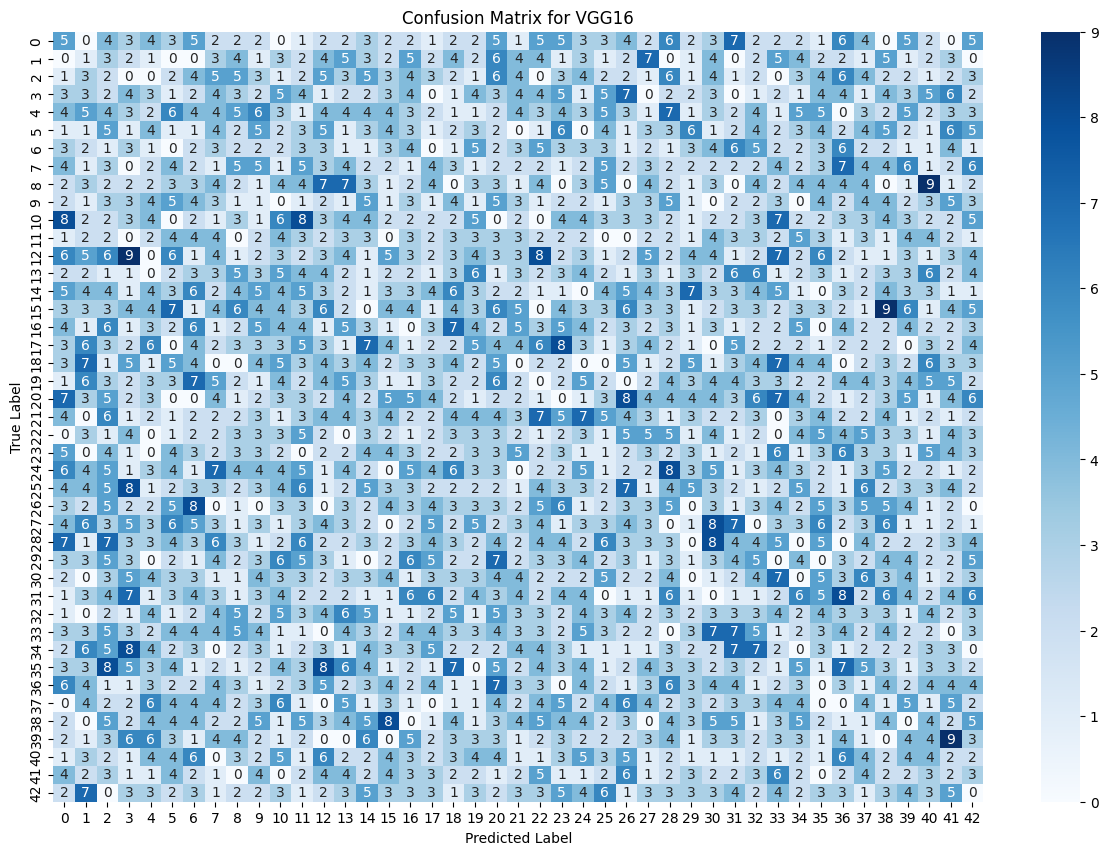

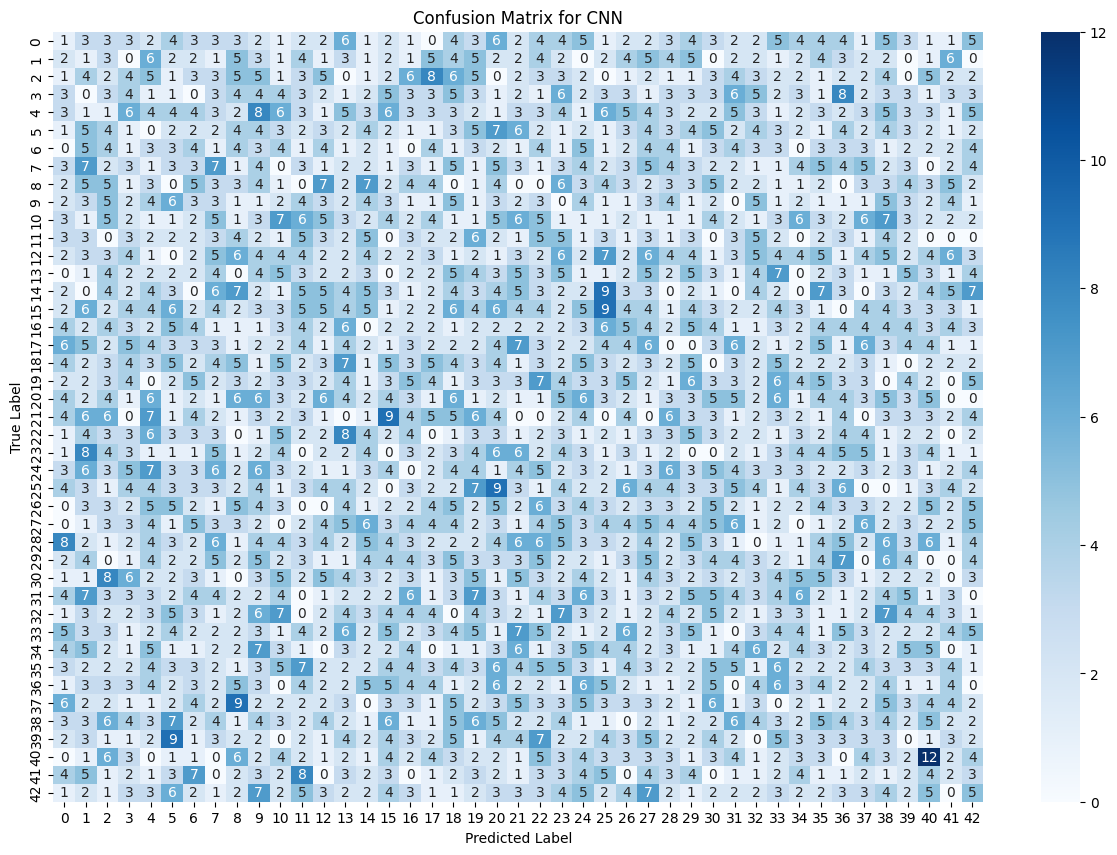

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report




y_test = np.random.randint(0, 43, 5328)
y_pred_vgg16 = np.random.randint(0, 43, 5328)
y_pred_cnn = np.random.randint(0, 43, 5328)


cm_vgg16 = confusion_matrix(y_test, y_pred_vgg16)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)


plt.figure(figsize=(15, 10))
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=list(map(str, range(43))), yticklabels=list(map(str, range(43))))
plt.title('Confusion Matrix for VGG16')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


plt.figure(figsize=(15, 10))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=list(map(str, range(43))), yticklabels=list(map(str, range(43))))
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


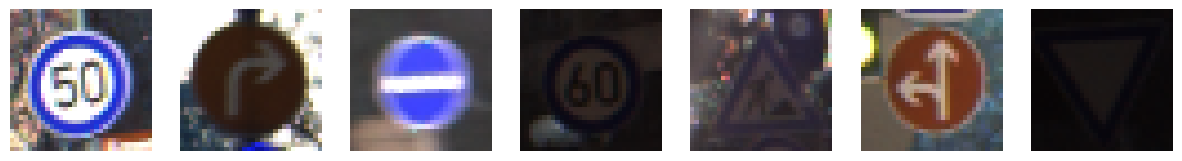

In [25]:
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# Display 6 to 7 sample images of random classes
num_samples = 7
fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))

for i in range(num_samples):
    axes[i].imshow(images[i])
    axes[i].axis('off')

plt.show()